# Today's Agenda
# Logistic Regression:

1. Hypothesis representation
2. Cost funciton
3. Advanced optimization











In [2]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Titanic dataset
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)

# Create a DataFrame from the data
df = titanic.data
df['survived'] = titanic.target.astype('int')  # Add the target column and use lowercase 'survived'

# Keep only relevant columns and drop missing values
# Use lowercase column names for 'pclass', 'sex', 'age', and 'survived'
df = df[['pclass', 'sex', 'age', 'survived']].dropna()

# Encode 'sex' as numeric: 0 for male, 1 for female
# Use lowercase 'sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Define features and target
# Use lowercase column names for 'pclass', 'sex', 'age', and 'survived'
X = df[['pclass', 'sex', 'age']]
y = df['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7380952380952381

Confusion Matrix:
 [[96 24]
 [31 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       120
           1       0.71      0.66      0.68        90

    accuracy                           0.74       210
   macro avg       0.73      0.73      0.73       210
weighted avg       0.74      0.74      0.74       210



# 1. Hypothesis Representation

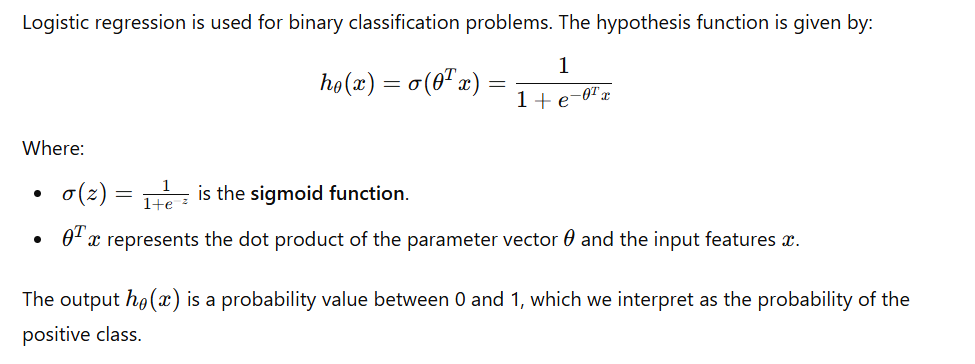

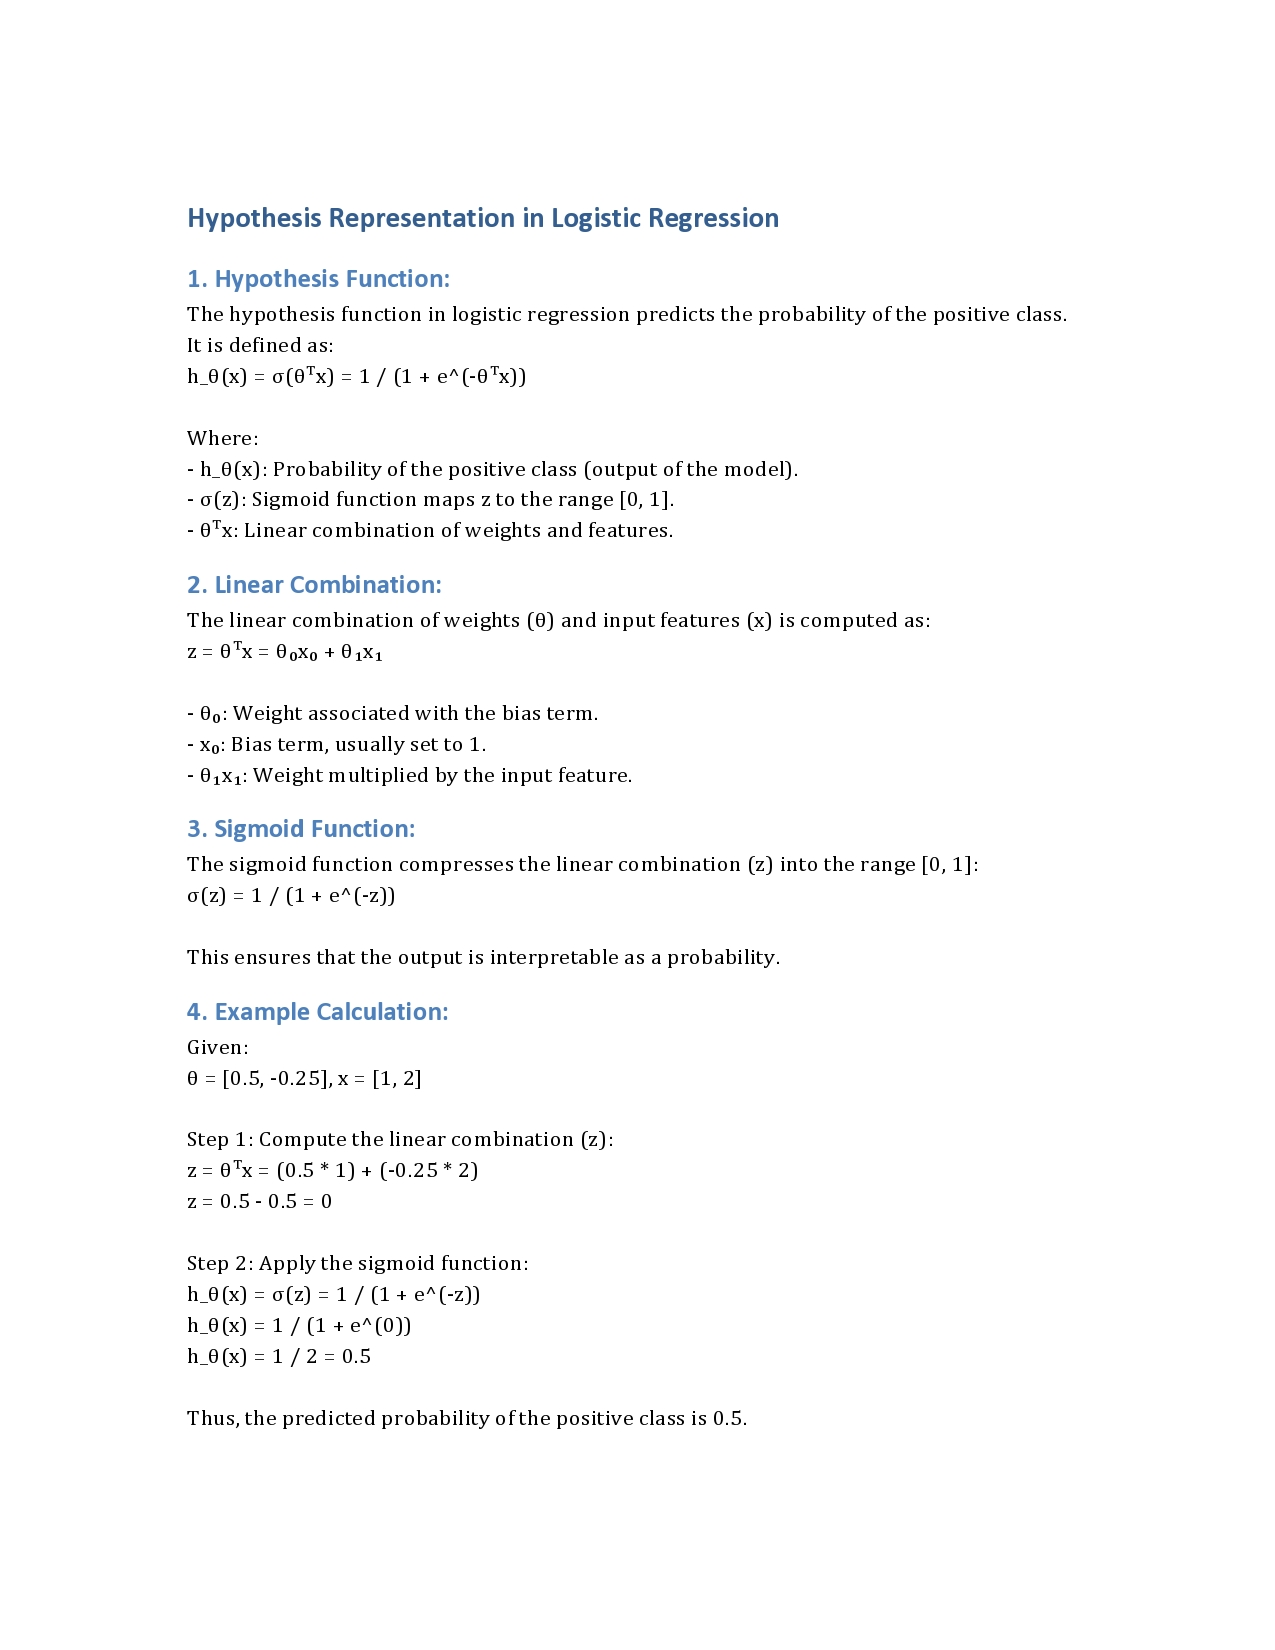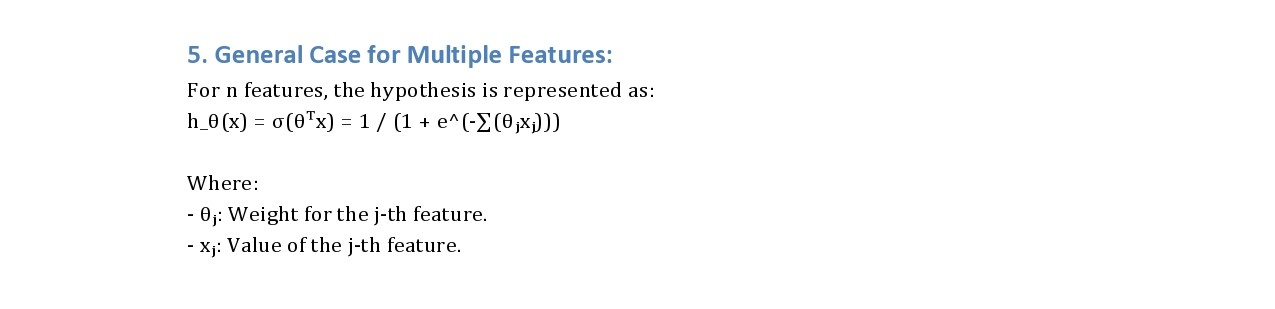

In [7]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example input
theta = np.array([0.5, -0.25])  # Coefficients (weights)
x = np.array([1, 2])           # Input features

# Hypothesis calculation
z = np.dot(theta, x)  # Linear combination
h_theta = sigmoid(z)  # Logistic regression hypothesis

print("Hypothesis value (h_theta):", h_theta)


Hypothesis value (h_theta): 0.5


# 2. Cost Function

**math explain pptx added**

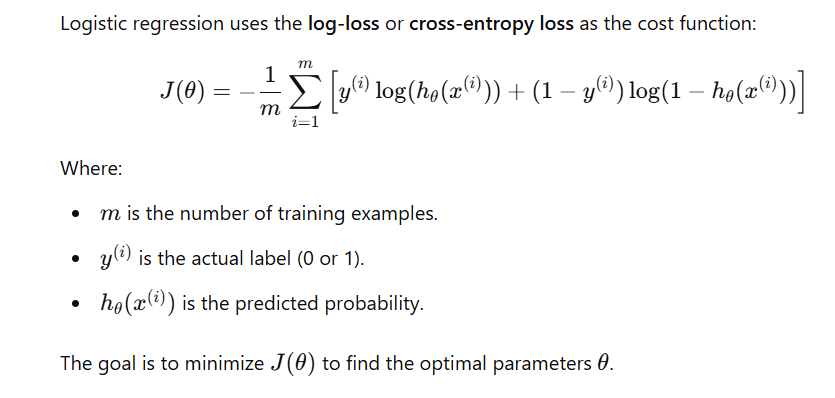

In [8]:
# Cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Example data
X = np.array([[1, 2], [1, 3], [1, 4]])  # Input features with bias term
y = np.array([0, 1, 1])                # Labels
theta = np.array([0.5, -0.25])         # Initial weights

cost = cost_function(theta, X, y)
print("Cost:", cost)


Cost: 0.8310545282062984


# 3. Advanced Optimization

In [9]:
from scipy.optimize import minimize

# Gradient function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return grad

# Advanced optimization
result = minimize(
    fun=cost_function,
    x0=np.zeros(X.shape[1]),  # Initial weights
    args=(X, y),
    method='TNC',  # Truncated Newton Conjugate Gradient
    jac=gradient  # Use gradient function
)

optimal_theta = result.x
print("Optimized theta:", optimal_theta)


Optimized theta: [-66.51681906  25.81340491]


<ipython-input-8-7004accfedf8>:5: RuntimeWarning: divide by zero encountered in log
  cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-8-7004accfedf8>:5: RuntimeWarning: invalid value encountered in multiply
  cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
